# Проект: 
# Исследование для некоммерческой организации DonorSearch

[Сcылка на сайт организации](https://donorsearch.org/)

<hr style="border: 2px solid green;" />

**Цели исследования**

- Составить портрет донора организации
- Сегментировать доноров
 
**Задачи**
1. Провести исследовательский анализ данных: 
    - проанализировать структуру таблиц,
    - типы данных,
    - проверить на наличие аномалий,
    - согласованность данных и т.д.;
3. Сегментировать доноров и определить портрет типичного донора    
2. Подготовить презентацию для заказчика

**Этапы выполнения проекта**
1. Знакомство с данными 

**Часть 1: Сегментация доноров:**

2. Предобработка данных:
   - 2.1 Добавление данных в таблицу
   
3. Исследовательски анализ данных (EDA) датасета с данными о донациях

4. Визуализация результатов и выводы к графикам
    - 4.1 Распределение доноров по странам и городам
    - 4.2 Распределение доноров по классу крови
    - 4.3 Распределение доноров по классу крови и городу 
    - 4.4 Распределение доноров по типу донации
    - 4.5 Распределение доноров по типу донации и городу
    - 4.6 Распределение донаций по периоду сдачи крови (году, месяцу, дню недели)
    - 4.7 Распределение донаций по статусу
    - 4.8 Распределение донаций по наличию справки
    
5. Сегментация доноров:
    - Определение групп,
    - Группа №1: активные доноры (сдавали кровь более 100 раз)

**Часть 2: Потрет донора:**

6. Предобработка данных:
   - 6.1 Добавление данных в таблицу users
   
7. Исследовательски анализ данных (EDA) датасета с данными о донорах

8. Визуализация результатов и выводы к графикам 
    - 8.1 Распределение количества доноров по годам
    - 8.2 Распределение количества регистраций по годам
    - 8.3 Распределение частоты встречаемости группы крови среди доноров
    - 8.4 Распределения доноров по полу
    - 8.5 Распределения доноров по возрастной группе (согласно ВОЗ)
    - 8.6 Распределения доноров по возрасту
    - 8.7 Распределения доноров по странам
    - 8.8 Распределения частоты встречаемости группы крови среди доноров мужского и женского пола
    - 8.9 Распределения года регистрации среди доноров мужского и женского пола

9. Портрет донора (выводы)

10. Портрет почетного донора

11. Подготовка презентации

<hr style="border: 2px solid green;" />

## Этап 1: Знакомство с данными

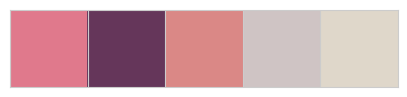

In [399]:
# Импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

import warnings
warnings.filterwarnings('ignore')

#палитра для построения графиков
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
sns.palplot(sns.color_palette(colors_nude))

In [400]:
# Загрузка датасетов

df = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\DonorSearch\datasets\donations_anon.csv', infer_datetime_format=True) #датафрейс с данными о донациях
users = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\DonorSearch\datasets\users_anon.csv', infer_datetime_format=True) #датафрейс с данными о донарах

In [401]:
# Cбросим ограничения на количество выводимых столбцов

pd.set_option('display.max_columns', None)

# Настроим вывод всего текста

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [402]:
# Выведем необходимые данные с общей информацией по всем датасетам

tables = [df, users]
names = ['df', 'users']

for name, table in zip(names, tables):
    print(
        f'\n\033[1;30;46m_____________ДАТАСЕТ:  {name.upper()}_____________\033[0;0m\n',
        '\n\033[2;30;47m Вывод первых строк: \033[0;0m',
        )
    display(table.head(3))
    print('\n\033[2;30;47m Общая информация: \033[0;0m')
    display(table.info(memory_usage='deep'))
    print('\033[2;30;47m Подсчет доли пропусков в %: \033[0;0m')
    display(round(table.isnull().mean() * 100, 2))
    print(
        '\033[2;30;47m Подсчет дубликатов\033[0;0m', 
        '  ', round(table.duplicated().mean() * 100, 4),  ' %'
        )
    print('\n\033[2;30;47m Общая сводка строковых значений: \033[0;0m')
    try:
        display(table.describe(include=['object']).T)
    except:
        print('Датасет не содержит строковых значений')
    print('\n\033[2;30;47m Сводка числовых значений, включая даты: \033[0;0m')
    try:
        display(table.describe(datetime_is_numeric=True).T)
    except:
        print('Датасет не содержит числовых значений')
    print ('\n\033[01;30;46m_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________\033[0;0m\n\n')


_____________ДАТАСЕТ:  DF_____________
 
 Вывод первых строк: 


,ID,ID пользователя,Класс крови,Дата донации,Дата добавления донации,Тип донации,Регион,Место стадчи,Статус донации,Есть справка
0,105346,178983,Цельная кровь,13.11.2021,15.12.2021,Безвозмездно,"Россия, Москва",641,На модерации,Да
1,105345,177352,Плазма,10.12.2021,15.12.2021,Безвозмездно,"Россия, Челябинская область, Магнитогорск",587,Без справки,Нет
2,105344,175382,Тромбоциты,13.12.2021,15.12.2021,Безвозмездно,"Россия, Москва",641,Без справки,Нет



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104770 entries, 0 to 104769
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       104770 non-null  int64 
 1   ID пользователя          104770 non-null  int64 
 2   Класс крови              104770 non-null  object
 3   Дата донации             104770 non-null  object
 4   Дата добавления донации  104770 non-null  object
 5   Тип донации              104770 non-null  object
 6   Регион                   104770 non-null  object
 7   Место стадчи             104770 non-null  object
 8   Статус донации           104770 non-null  object
 9   Есть справка             104770 non-null  object
dtypes: int64(2), object(8)
memory usage: 71.2 MB


None

 Подсчет доли пропусков в %: 


ID                        0.00
ID пользователя           0.00
Класс крови               0.00
Дата донации              0.00
Дата добавления донации   0.00
Тип донации               0.00
Регион                    0.00
Место стадчи              0.00
Статус донации            0.00
Есть справка              0.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
Класс крови,104770,5,Цельная кровь,72861
Дата донации,104770,5646,20.04.2015,118
Дата добавления донации,104770,392,18.11.2020,91566
Тип донации,104770,2,Безвозмездно,97375
Регион,104770,372,Не указано,92453
Место стадчи,104770,772,Выездная акция,9335
Статус донации,104770,5,Принята,94300
Есть справка,104770,2,Да,102358



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
ID,104770.00,52645.86,30369.30,1.00,26427.25,52642.50,78914.75,105346.00
ID пользователя,104770.00,90927.08,55416.17,4.00,39847.00,117513.00,140167.00,178983.00



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  USERS_____________
 
 Вывод первых строк: 


,ID,Пол,Дата рождения,Регион,Группа крови,Kell-фактор,Цельная кровь,Плазма,Тромбоциты,Эритроциты,Лейкоциты,Костный мозг,Почетный донор,Отвод от донации,Цельная кровь.1,Плазма.1,Тромбоциты.1,Эритроциты.1,Лейкоциты.1,Дата регистрации,Не подтверждённые донации
0,178985,Женский,03.03.2003,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,15.12.2021,0
1,178984,Мужской,25.01.1981,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,15.12.2021,0
2,178983,Не указано,Не указано,"Россия, Москва",B(III) Rh-,Отрицательный,Да,Да,Нет,Нет,Нет,Нет,Дата получения не известна,Нет,0,0,0,0,0,15.12.2021,1



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177910 entries, 0 to 177909
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         177910 non-null  int64 
 1   Пол                        177910 non-null  object
 2   Дата рождения              177910 non-null  object
 3   Регион                     177910 non-null  object
 4   Группа крови               177910 non-null  object
 5   Kell-фактор                177910 non-null  object
 6   Цельная кровь              177910 non-null  object
 7   Плазма                     177910 non-null  object
 8   Тромбоциты                 177910 non-null  object
 9   Эритроциты                 177910 non-null  object
 10  Лейкоциты                  177910 non-null  object
 11  Костный мозг               177910 non-null  object
 12  Почетный донор             177910 non-null  object
 13  Отвод от донации       

None

 Подсчет доли пропусков в %: 


ID                          0.00
Пол                         0.00
Дата рождения               0.00
Регион                      0.00
Группа крови                0.00
Kell-фактор                 0.00
Цельная кровь               0.00
Плазма                      0.00
Тромбоциты                  0.00
Эритроциты                  0.00
Лейкоциты                   0.00
Костный мозг                0.00
Почетный донор              0.00
Отвод от донации            0.00
Цельная кровь.1             0.00
Плазма.1                    0.00
Тромбоциты.1                0.00
Эритроциты.1                0.00
Лейкоциты.1                 0.00
Дата регистрации            0.00
Не подтверждённые донации   0.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
Пол,177910,3,Не указано,132936
Дата рождения,177910,12182,Не указано,134838
Регион,177910,2550,Не указано,44230
Группа крови,177910,10,Не указано,158618
Kell-фактор,177910,4,Не указано,146186
Цельная кровь,177910,2,Да,177606
Плазма,177910,2,Да,176930
Тромбоциты,177910,2,Да,176605
Эритроциты,177910,2,Да,176414
Лейкоциты,177910,2,Да,176381



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
ID,177910.00,89063.16,51522.70,1.00,44478.25,88956.50,133435.75,178985.00
Цельная кровь.1,177910.00,0.36,1.80,0.00,0.00,0.00,0.00,66.00
Плазма.1,177910.00,0.11,1.65,0.00,0.00,0.00,0.00,216.00
Тромбоциты.1,177910.00,0.06,0.99,0.00,0.00,0.00,0.00,118.00
Эритроциты.1,177910.00,0.00,0.06,0.00,0.00,0.00,0.00,8.00
Лейкоциты.1,177910.00,0.00,0.02,0.00,0.00,0.00,0.00,4.00
Не подтверждённые донации,177910.00,0.06,0.76,0.00,0.00,0.00,0.00,66.00



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________




In [403]:
# Проверим наличие полных дубликатов

print("Количество полных дубликатов: {}".format(df.duplicated().sum()))

Количество полных дубликатов: 0


<hr style="border: 2px solid green;" />

# Часть 1: Сегментация доноров

## Этап 2: Предобработка данных

In [404]:
#корректируем названия колонок (меняем на нижний регистр, добавляем snake_case)
df1_columns = df.columns

def df_columns(df, columns):
    df.columns = columns.str.replace(' ', '_').str.lower()
    return df

df = df_columns(df, df1_columns)
df = df.rename(columns={'место_стадчи':'место_сдачи'})
df.head(2)

,id,id_пользователя,класс_крови,дата_донации,дата_добавления_донации,тип_донации,регион,место_сдачи,статус_донации,есть_справка
0,105346,178983,Цельная кровь,13.11.2021,15.12.2021,Безвозмездно,"Россия, Москва",641,На модерации,Да
1,105345,177352,Плазма,10.12.2021,15.12.2021,Безвозмездно,"Россия, Челябинская область, Магнитогорск",587,Без справки,Нет


In [405]:
# Корректируем названия колонок (меняем на нижний регистр, добавляем snake_case) в датафрейме users

columns = users.columns

def df_columns(users, columns):
    users1_columns = users.columns
    users.columns = columns.str.replace(' ', '_').str.lower()
    return users

users = df_columns(users, columns)
users.head(2)

,id,пол,дата_рождения,регион,группа_крови,kell-фактор,цельная_кровь,плазма,тромбоциты,эритроциты,лейкоциты,костный_мозг,почетный_донор,отвод_от_донации,цельная_кровь.1,плазма.1,тромбоциты.1,эритроциты.1,лейкоциты.1,дата_регистрации,не_подтверждённые_донации
0,178985,Женский,03.03.2003,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,15.12.2021,0
1,178984,Мужской,25.01.1981,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,15.12.2021,0


In [406]:
#проверка значений в колонке (наличие неточностей написания)
df['класс_крови'].unique()

array(['Цельная кровь', 'Плазма', 'Тромбоциты', 'Эритроциты',
       'Гранулоциты (Лейкоциты)'], dtype=object)

In [407]:
#проверка значений в колонке (наличие неточностей написания)
df['тип_донации'].unique()

array(['Безвозмездно', 'Платно'], dtype=object)

In [408]:
#проверка значений в колонке (наличие неточностей написания)
df['статус_донации'].unique()

array(['На модерации', 'Без справки', 'Удалена', 'Принята', 'Отклонена'],
      dtype=object)

In [409]:
#проверка значений в колонке (наличие неточностей написания)
df['дата_донации'].value_counts()

20.04.2015    118
20.04.2016    117
03.03.2016    103
14.06.2018    102
22.04.2015     96
             ... 
15.04.2003      1
18.08.2008      1
25.12.2006      1
29.05.2008      1
28.02.2005      1
Name: дата_донации, Length: 5646, dtype: int64

### 2.1 Добавление данных в таблицу

In [410]:
# выделяем город и страну из колонки "регион", добавляем новые колонки "город", 'страна'

df['город'] = df['регион'].apply(lambda x: x.split(',')[-1])
df['город'].str.strip()

df['страна'] = df['регион'].apply(lambda x: x.split(',')[0])
df['страна'].str.strip()

df.head(2)

,id,id_пользователя,класс_крови,дата_донации,дата_добавления_донации,тип_донации,регион,место_сдачи,статус_донации,есть_справка,город,страна
0,105346,178983,Цельная кровь,13.11.2021,15.12.2021,Безвозмездно,"Россия, Москва",641,На модерации,Да,Москва,Россия
1,105345,177352,Плазма,10.12.2021,15.12.2021,Безвозмездно,"Россия, Челябинская область, Магнитогорск",587,Без справки,Нет,Магнитогорск,Россия


**Комментарии:**

В процессе анализа я выделила самых активных доноров, которые сдавали кровь более 100 раз (всего 18 человек).
Сгруппировав данные, посмотрела распределение этих доноров по городам, оказалось, что колонка "город" у некоторых id_пользователя заполнена частично. На этом основании добавляю город донорам по id_пользователя ниже. 

In [411]:

def user(row):
    Moscow = [607, 1856, 3121, 135411, 139626, 150916, 152002, 11, 14, 68, 79, 288, 361, 395, 
              500, 565, 255, 345, 713, 779, 836, 1050, 1077, 1288, 1390, 1649, 1542, 1670, 1892, 2183, 2226,
             2447, 2455, 2499, 2573, 2601, 2726, 2885, 3119, 3245, 3491, 3956, 4038, 4326, 4769, 4809, 4861,
             5005, 5840]
    Odessa = [133136, 1575]
    Rostov_on_Don = [36395, 195, 1631, 2641, 2937, 3154]
    Kazan = [141102, 52, 512, 725, 1167, 1604, 1797, 1842, 2446, 2528, 2722, 2780, 2872, 4566, 6612]
    Omsk = [142345]
    Ukhta = [151862]
    Astrahan = [149269]
    Ekaterinburg = [140, 1030, 3184, 4325]
    Bryansk = [67]
    Kaliningrad = [207, 5310]
    St_Peterburg = [422, 469, 355, 312, 780, 963, 1066, 1432, 1508, 1571, 1827, 1806, 2068, 2114, 2418, 2564, 2673, 
                    2824, 2868, 2914, 2967, 3027, 3033, 4760, 5714, 6381]
    Uralsk = [494]
    Irkutsk = [553]
    Izhevsk = [393]
    Novokuznetsk = [608]
    Krasnodar = [252]
    Taganrog = [228, 764, 3284]
    Tomsk = [242]
    Chelyabinsk = [850]
    Simferopl = [1630]
    Voronezh = [1745, 4016]
    Saratov = [2289, 3955]
    Tver = [2559]
    Ufa = [2650, 6527]
    Tyumen = [3395, 6576]
    Chelyabinsk = [3494]
    Novocherkassk = [5094]
    Murmansk = [5151]
    user_id = row['id_пользователя']
    city = row['город']
    if user_id in Moscow:
        return 'Москва'
    elif user_id in Odessa:
        return 'Одесса'
    elif user_id in Rostov_on_Don:
        return 'Ростов-на-Дону'
    elif user_id in Kazan:
        return 'Казань'
    elif user_id in Omsk:
        return 'Омск'
    elif user_id in Ukhta:
        return 'Ухта'
    elif user_id in Astrahan:
        return 'Астрахань'
    elif user_id in Ekaterinburg:
        return 'Екатеринбург'
    elif user_id in Bryansk:
        return 'Брянск'
    elif user_id in Kaliningrad:
        return 'Калининград'
    elif user_id in St_Peterburg:
        return 'Санкт-Петербург'
    elif user_id in Uralsk:
        return 'Уральск'
    elif user_id in Irkutsk:
        return 'Иркутск'
    elif user_id in Izhevsk:
        return 'Ижевск'
    elif user_id in Novokuznetsk:
        return 'Новокузнецк'
    elif user_id in Krasnodar:
        return 'Краснодар'
    elif user_id in Taganrog:
        return 'Таганрог'
    elif user_id in Tomsk:
        return 'Томск'
    elif user_id in Chelyabinsk:
        return 'Челябинск'
    elif user_id in Simferopl:
        return 'Симферополь'
    elif user_id in Voronezh:
        return 'Воронеж'
    elif user_id in Saratov:
        return 'Саратов'
    elif user_id in Tver:
        return 'Тверь'
    elif user_id in Ufa:
        return 'Уфа'
    elif user_id in Tyumen:
        return 'Тюмень'
    elif user_id in Chelyabinsk:
        return 'Челябинск'
    elif user_id in Novocherkassk:
        return 'Новочеркасск'
    elif user_id in Murmansk:
        return 'Мурманск'
    else:
        return city
    
df['город'] = df.apply(user, axis=1)

In [412]:
# После добавления городов, корректируем еще раз пробелы

df['город'] = df['город'].str.strip()
df['страна'] = df['страна'].str.strip()

**Комментарии:**

В исходном файле колонка "дата_донации" имеет тип данных object, в данных колонки есть аномалии (даты, которые не входят в заданный диапазон to_datetime()).
После преобразования в данных в колонке "дата_донации" появились nan.

In [413]:
df['дата_донации']= pd.to_datetime(df['дата_донации'], yearfirst=True, errors = 'coerce')
df['год_донации'] = df['дата_донации'].dt.year
df['год_донации'] = df['год_донации'].fillna(0)
df['год_донации'] = df['год_донации'].astype('int')

In [414]:
# Добавляем колонки с месяцем и днем недели

df['месяц_донации'] = df['дата_донации'].dt.month
df['день_недели_донации'] = df['дата_донации'].dt.weekday

### Выводы:

1. Скорректированы названия сетей в колонке object_name:
- Текст приведен к нижнему регистру;
- Удалены лишние пробелы, дефисы;
- Названия в рамках одной сети приведены к общему стилю написания

Итог: после проведения предобработки число уникальных названий сократилось на 3% (с 9924 до 9631). 

2. Название улицы выделено в отдельную колонку 

## Этап 3: Исследовательский анализ данных

**Комментарии:**

Исследуем колонку "год_донации":
 - присутствуют аномалии с датой, например, 2107, 2091, 2050 года
 - по данным сайта DonorSearch проект начался в 2010 году, но в таблице есть данные за более ранние периоды
 - часть ошибок данных можно объяснить человеческим фактором из-за неправильного ввода даты:
    - возможно, донор перепутал с годом рождения
    - часть доноров вносили данные за более ранние периоды (до старта проекта), если могли подкрепить это справками
    
DonorSearch заинтересована посчитать людей, которые сначала зарегистрировались, а потом сдали в первый раз кровь. Поэтому очень старые донации можно удалить из анализа.    

In [415]:
year = (
    df['год_донации'].value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'год_донации', 'год_донации':'количество'})
    .sort_values(by='год_донации', ascending=False)
)
year.head(5)

,год_донации,количество
41,2107,1
44,2091,1
47,2050,1
6,2021,6727
7,2020,6328


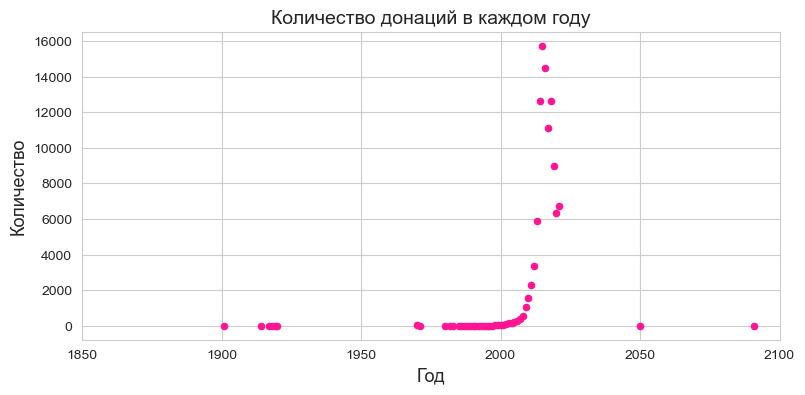

In [416]:
# Данные за  2107, 2091, 2050 года считаем выбросами и удаляем
# В данных есть 29 записей 1970 года, это может быть дата рождения донора, а не дата сдачи крови

year.plot(x='год_донации', y='количество', kind='scatter', grid=True, c = 'deeppink', figsize=(9, 4))
sns.set_style("whitegrid")
plt.title('Количество донаций в каждом году', size=14)
plt.xlabel('Год', size=13)
plt.ylabel('Количество', size=13)
plt.xlim(1850, 2100)
plt.show();

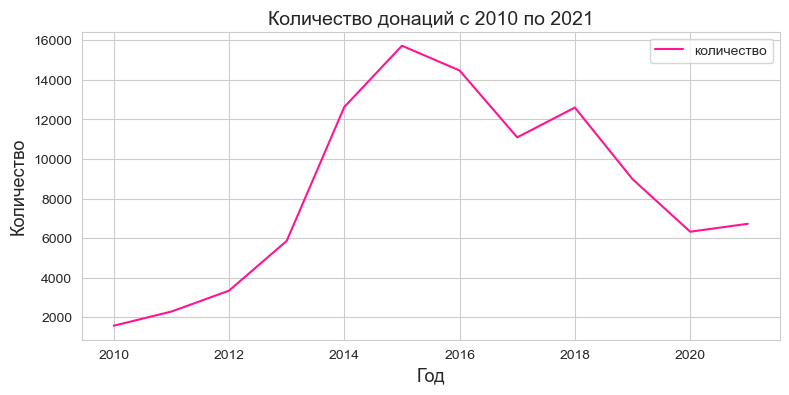

In [417]:
# Оставляем в датафреме данные только за период существования проекта с 2010 по 2021 года

df = df.query('2010 < дата_донации < 2022')

year_2 = (
    df['год_донации'].value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'год_донации', 'год_донации':'количество'})
    .sort_values(by='год_донации', ascending=False)
)

year_2.plot(x='год_донации', y='количество', kind='line', grid=True, c = 'deeppink', figsize=(9, 4))
sns.set_style("whitegrid")
plt.title('Количество донаций с 2010 по 2021', size=14)
plt.xlabel('Год', size=13)
plt.ylabel('Количество', size=13)
plt.show();

In [418]:
year_2['количество'].describe()

count      12.00
mean     8471.00
std      4831.46
min      1575.00
25%      5231.75
50%      7856.50
75%     12611.00
max     15729.00
Name: количество, dtype: float64

**Комментарии:**

- В среднем в исследуемый период в год 7856 донации;
- Минимальное значение было в 2010 году - 1575 донации;
- Максимальное значение в 2015 году 15729 донаци.

In [419]:
print('Количество доноров в исследуемый период:', df['id_пользователя'].nunique())
print('Количество донаций в исследуемый период:', df['id_пользователя'].count())

Количество доноров в исследуемый период: 26677
Количество донаций в исследуемый период: 101652


**Комментарии:**
    
В исследуемый период (с 2010 по 2021) в датафрейме:
- 26677 id_пользователя, которые зарегистрировали свои донации
- Получено 101652 донации

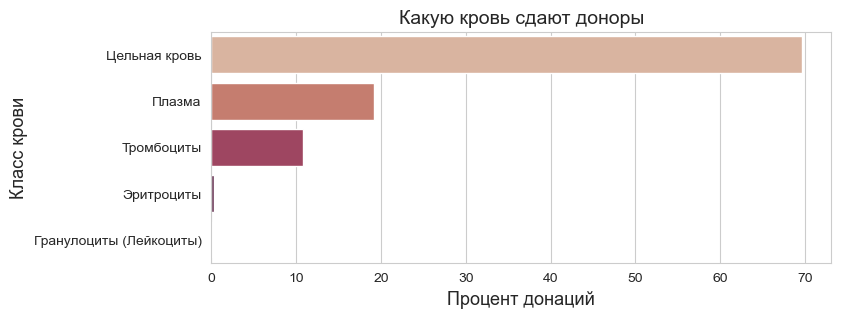

In [420]:
# Исследуем, какую кровь сдают доноры

blood = (
    (df['класс_крови'].value_counts(normalize=True)*100)
    .to_frame()
    .reset_index()
    .rename(columns={'index':'класс_крови', 'класс_крови':'процент'})
)
blood

plt.figure(figsize=(8, 3))
plt.grid(True)
sns.barplot(y='класс_крови', x='процент', data=blood, palette="rocket_r", saturation=.5)
sns.set_style("whitegrid")
plt.title('Какую кровь сдают доноры', size=14)
plt.xlabel('Процент донаций', size=13)
plt.ylabel('Класс крови', size=13)
plt.show()

**Комментарии:**
    
- Большая часть доноров (69%) сдают цельную кровь

In [421]:
#ОБНОВЛЕНИЕ
#92% доноров сдают кровь безвозмездно    
( 
    (df['тип_донации'].value_counts(normalize=True)*100)
    .to_frame()
    .reset_index()
    .rename(columns={'index':'тип_донации', 'тип_донации':'процент'})
)

,тип_донации,процент
0,Безвозмездно,92.87
1,Платно,7.13


In [422]:
#в 89% случаев донация в статусе "принята".
( 
    (df['статус_донации'].value_counts(normalize=True)*100)
    .to_frame()
    .reset_index()
    .rename(columns={'index':'статус_донации', 'статус_донации':'процент'})
)

,статус_донации,процент
0,Принята,89.89
1,Без справки,7.30
2,Удалена,2.60
3,Отклонена,0.21
4,На модерации,0.01


In [423]:
( 
    (df['страна'].value_counts(normalize=True)*100)
    .to_frame()
    .reset_index()
    .rename(columns={'index':'страна', 'страна':'процент'})
)

,страна,процент
0,Не указано,88.09
1,Россия,11.61
2,Беларусь,0.13
3,Украина,0.11
4,Казахстан,0.05
5,Молдова,0.01
6,Кыргызстан,0.00


In [424]:
#ОБНОВЛЕНИЕ
# ~98% доноров предоставили справку
( 
    (df['есть_справка'].value_counts(normalize=True)*100)
    .to_frame()
    .reset_index()
    .rename(columns={'index':'есть_справка', 'есть_справка':'процент'})
)

,есть_справка,процент
0,Да,97.67
1,Нет,2.33


### Промежуточные выводы

1. Большая часть аномалий присутствует в колонке с датой донации, например, будущие даты (2107, 2091, 2050 года).
Часть ошибок в данных можно объяснить человеческим фактором из-за неправильного ввода даты, доноры самостоятельно указывают ее на сайте проекта. Кроме того, часть данных доноры могли вводить до начала существования проекта Donor Search (т.е. до 2010 года), регистрируя имеющиеся у них справки. Это может быть важно для тех, кто планирует стать "почетным донором";
2. Так как по желанию заказчика интерес составляют те донации, которые возникли благодаря проекту, оставляем в датафреме данные за период с 2010 по 2021; 
3. По графику видно, что за указанный период есть два пика по количеству донаций - в 2015 (максимальный) и в 2018;
4. Большая часть доноров (69%) сдают цельную кровь;
5. 92% доноров сдают кровь безвозмездно;
6. Справку предоставляют ~98% доноров;
7. Однако только в 89% случаев донация в статусе "принята".

## Этап 4:  Визуализация результатов и выводы к графикам

 - 4.1 Распределение доноров по странам и городам
 - 4.2 Распределение доноров по классу крови
 - 4.3 Распределение доноров по классу крови и городу 
 - 4.4 Распределение доноров по типу донации
 - 4.5 Распределение доноров по типу донации и городу
 - 4.6 Распределение донаций по периоду сдачи крови (году, месяцу, дню недели)
 - 4.7 Распределение донаций по статусу
 - 4.8 Распределение донаций по наличию справки

### 4.1 Распределение доноров по странам и городам

In [425]:
donor_country = (
    df.groupby(['страна'])[['id_пользователя']].count()
    .query('страна != "Не указано"')
    .rename(columns={'id_пользователя':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
)
donor_country

donor_country['процент'] = (
    donor_country['количество'] / donor_country['количество'].sum()
)
donor_country

barchart_donor_country = px.bar(
    data_frame=donor_country,
    y="количество",
    x="страна",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                                 
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='страна',  
    #hover_data=['количество'],    
    labels={"количество":"Количество доноров", "страна":"Название страны"},           
    title='Количество доноров по странам', 
    width=1000,                  
    height=450,                   
    template='seaborn'          
)
barchart_donor_country

In [426]:
# В данных представлены 368 города (из шести стран)
print('Количество городов, в которых регистрировали донации:', df.query('город != "Не указано"')['город'].nunique())

Количество городов, в которых регистрировали донации: 368


In [427]:
# Создаем функцию для группировки и подсчета доноров на город 

def user_city_query(df, id_value_1, id_value_2):
    query = (
    df.query('город != "Не указано"')
    .groupby(['город'])[['id_пользователя']].count()
    .rename(columns={'id_пользователя':'количество'})
    .sort_values(by='количество', ascending=False)
    .query('@id_value_1 <= количество <= @id_value_2')
    .reset_index()
)
    return query

# Определяем переменные, которые будут содержать нужную группировку данных
donor_city_count_large = user_city_query(df, 100, 10000)
donor_city_count_medium = user_city_query(df, 40, 99)
donor_city_count_small = user_city_query(df, 2, 39)
donor_city_count_one = user_city_query(df, 1, 1)
#donor_city_count_large

In [428]:
# Процентное соотношение доноров на город

donor_city_count_total = user_city_query(df, 1, 10000)
donor_city_count_total['процент'] = donor_city_count_total['количество'] / donor_city_count_total['количество'].sum()
donor_city_count_total.head()

,город,количество,процент
0,Москва,4856,0.33
1,Казань,1195,0.08
2,Санкт-Петербург,1183,0.08
3,Набережные Челны,283,0.02
4,Екатеринбург,246,0.02


In [429]:
# Создаем функцию для построения визуализаций с количеством доноров на город 

def donor_city__count_visualisation(df, dimensions=[], hover_name='', title=''):
    barchart_donor_city = px.bar(
        data_frame=df,
        y="количество",
        x=dimensions,
        color="количество",
        opacity=0.9,                  
        orientation="v",              
        barmode='relative',
        #color_discrete_sequence=['palevioletred'],               
        color_continuous_scale=px.colors.sequential.Burg,       
        #color_continuous_midpoint=100,                          
        range_color=[1,10000],                                   
        text='количество',            
        hover_name=hover_name,  
        #hover_data=['id'],   
        #custom_data=[''],     
        labels={"количество":"Количество", "город":"Город"},           
        title=title, 
        width=1000,                  
        height=600,                   
        template='seaborn',            
)
    return barchart_donor_city

barchart_donor_city_count = donor_city__count_visualisation(donor_city_count_large, dimensions=['город'], hover_name='город', title='Распределение доноров по городам')
#barchart_donor_city_large

In [430]:
donor_city_count_large['количество'].describe()

count     21.00
mean     480.05
std     1050.29
min      105.00
25%      123.00
50%      157.00
75%      231.00
max     4856.00
Name: количество, dtype: float64

**Комментарии:**
    
- Всего 21 город, где количество доноров более 100 человек
- В среднем в выделенной группе городов по 157 доноров, больше всего в Москве - 4856, меньше в Барнауле - 105

In [431]:
barchart_donor_city_count_large = px.bar(
    data_frame=donor_city_count_large,
    y="количество",
    x="город",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                                 
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='город',  
    #hover_data=['количество'],    
    labels={"количество":"Количество доноров", "город":"Название города"},           
    title='Количество доноров (более 100 доноров на город)', 
    width=1100,                  
    height=450,                   
    template='seaborn'          
)
barchart_donor_city_count_large

In [432]:
donor_city_count_medium['количество'].describe()

count   35.00
mean    61.74
std     14.74
min     40.00
25%     52.00
50%     59.00
75%     69.00
max     94.00
Name: количество, dtype: float64

**Комментарии:**
    
- Всего 35 городов, где количество доноров от 40 до 99 человек
- В среднем в выделенной группе городов по 59 доноров, больше всего во Владивостоке - 94, меньше в Нижневартовске - 40

In [433]:
barchart_donor_city_count_medium = px.bar(
    data_frame=donor_city_count_medium,
    y="количество",
    x="город",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',               
    color_continuous_scale=px.colors.sequential.Burg,                                
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='город',  
    #hover_data=['количество'],        
    labels={"количество":"Количество доноров", "город":"Название города"},           
    title='Количество доноров (от 40 до 99 на город)', 
    width=1100,                  
    height=450,                   
    template='seaborn',            
)
barchart_donor_city_count_medium

In [434]:
donor_city_count_small['количество'].describe()

count   225.00
mean     10.40
std       9.17
min       2.00
25%       3.00
50%       7.00
75%      15.00
max      39.00
Name: количество, dtype: float64

**Комментарии:**
    
- Всего 225 городов, где количество доноров от 2 до 39 доноров
- В среднем в выделенной группе городов по 7 доноров, больше всего в Ульяновске - 39

In [435]:
donor_city_count_one.count()

город         87
количество    87
dtype: int64

**Комментарии:**
    
- Всего 87 городов, где зарегистрирован всего 1 донор

### Вывод к разделу "Распределение доноров по странам и городам"

1. Всего 21 город, где количество доноров превышает 100 человек. Среди них три города (Москва, Санкт-Петербург и Казань), где более 1000 доноров. Максимальное количество в Москве, где зарегистрировано более 4,800 доноров.
2. От 40 до 99 доноров проживает в 35 городах. В среднем в выделенной группе по 59 доноров, больше всего во Владивостоке (94), наименьшее в Нижневартовске (40 доноров).
3. Всего 225 городов, где количество доноров от 2 до 39, в среднем в данной группе по 7 доноров на город, больше всего в Ульяновске (39 человек). 
4. По одному донору проживает в 87 городах.

### 4.2 Распределение доноров по классу крови

In [436]:
donor_blood_class = (
    df.groupby(['класс_крови'])[['id_пользователя']].count()
    .rename(columns={'id_пользователя':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
)
#donor_blood_class

barchart_blood_class = px.bar(
    data_frame=donor_blood_class,
    y="количество",
    x="класс_крови",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,                                
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='класс_крови',  
    #hover_data=['количество'],      
    labels={"количество":"Количество донаций", "класс_крови":"Класс крови"},           
    title='Распределение количества донаций по классу крови', 
    width=1000,                  
    height=450,                   
    template='seaborn',            
)
barchart_blood_class

### Вывод к разделу "Распределение доноров по классу крови"

График отражает абсолютные значения.
 - Большая часть всех доноров сдает цельную кровь (более 70.000 человек);
 - Меньше всего сдают гранулоциты (лейкоциты).	

### 4.3 Распределение доноров по классу крови и городу

In [437]:
#для наглядности визуализации, рассмотрим группы городов, которые выделили ранее

donor_blood_class_city_slarge = (
    df.query('город == "Москва" | город == "Санкт-Петербург" | город == "Казань"')
    .groupby(['город', 'класс_крови'])[['класс_крови']].count()
    .rename(columns={'класс_крови':'количество'})
    .sort_values(by=['количество'], ascending=False)
    .reset_index()
)
#donor_blood_class_city_slarge

barchart_blood_class_city_slarge = px.bar(
    data_frame=donor_blood_class_city_slarge,
    y="количество",
    x="город",
    color="класс_крови",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='город',  
    #hover_data=['количество'],       
    labels={"количество":"Количество донаций", "город":"ТОП-3 городов по количеству доноров"},           
    title='Распределение количества донаций каждого класса крови по городам', 
    width=800,                  
    height=600,                   
    template='seaborn',            
)
barchart_blood_class_city_slarge

In [438]:
#для наглядности визуализации, рассмотрим группы городов, которые выделили ранее.

donor_city_large_list = donor_city_count_large['город'].tolist()

donor_blood_class_city_large = (
    df.query('город == @donor_city_large_list & (город != "Москва") & (город != "Санкт-Петербург") & (город != "Казань")')
    .groupby(['город', 'класс_крови'])[['класс_крови']].count()
    .rename(columns={'класс_крови':'количество'})
    .sort_values(by=['количество'], ascending=False)
    .reset_index()
)
#donor_blood_class_city_large

barchart_blood_class_city_large = px.bar(
    data_frame=donor_blood_class_city_large,
    y="количество",
    x="город",
    color="класс_крови",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='город',  
    #hover_data=['количество'],       
    labels={"количество":"Количество донаций", "город":"Город"},           
    title='Распределение количества донаций каждого класса крови по городам', 
    width=1000,                  
    height=600,                   
    template='seaborn',            
)
barchart_blood_class_city_large

In [439]:
table_blood_class_city_large = df.query('город == @donor_city_large_list')
table_blood_class_city_large = (
    pd.crosstab(index=table_blood_class_city_large['город'], 
                columns=[table_blood_class_city_large['класс_крови']],
                margins=True).style.background_gradient(cmap='Reds')
)
table_blood_class_city_large

класс_крови,Гранулоциты (Лейкоциты),Плазма,Тромбоциты,Цельная кровь,Эритроциты,All
город,,,,,,
Альметьевск,0,12,0,145,0,157
Астрахань,0,73,2,48,0,123
Барнаул,0,24,11,70,0,105
Благовещенск,0,33,0,84,0,117
Воронеж,0,73,12,77,0,162
Екатеринбург,0,0,8,238,0,246
Ижевск,0,68,10,65,0,143
Казань,1,402,80,709,3,1195
Краснодар,0,43,5,126,0,174


### Вывод к разделу "Распределение доноров по классу крови и городу" 

График отражает абсолютные значения.
- По городам в основном сдают цельную кровь, плазму и тромбоциты (в разных пропорциях по каждому городу);
- Не везде доноры чаще сдают цельную кровь. Например, доноры городов Ухта, Норильск, Одесса и Минск чаще сдают плазму крови.

### 4.4 Распределение доноров по типу донации 

In [440]:
donor_donation_type = (
    df.groupby(['тип_донации'])[['id_пользователя']].count()
    .rename(columns={'id_пользователя':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
)
#donor_donation_type

barchart_donation_type = px.bar(
    data_frame=donor_donation_type,
    y="количество",
    x="тип_донации",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',               
    color_continuous_scale=px.colors.sequential.Burg,                                 
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='тип_донации',  
    #hover_data=['количество'],        
    labels={"количество":"Количество донаций", "тип_донации":"Тип донации"},           
    title='Распределение донаций по типу', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_donation_type

In [441]:
donors_russia = df.query('страна == "Россия"')

donor_donation_type_russia = (
    donors_russia.groupby(['тип_донации'])[['id_пользователя']].count()
    .rename(columns={'id_пользователя':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
)
#donor_donation_type_russia

barchart_donation_type_russia = px.bar(
    data_frame=donor_donation_type_russia,
    y="количество",
    x="тип_донации",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',               
    color_continuous_scale=px.colors.sequential.Burg,                                 
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='тип_донации',  
    #hover_data=['количество'],        
    labels={"количество":"Количество донаций", "тип_донации":"Тип донации"},           
    title='Распределение донаций по типу (по России)', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_donation_type_russia

In [442]:
donor_donation_type_russia['процент'] = (
    donor_donation_type_russia['количество'] / donor_donation_type_russia['количество'].sum()
)
donor_donation_type_russia

,тип_донации,количество,процент
0,Безвозмездно,11230,0.95
1,Платно,570,0.05


### Вывод к разделу "Распределение доноров по типу донации " 

График отражает абсолютные значения.
- Большая часть доноров сдает кровь безвозмездно (долее 94.000 человек). 

### 4.5 Распределение доноров по типу донации и городу

In [443]:
#для наглядности визуализации, рассмотрим группы городов, которые выделили ранее

donor_donation_type_city_slarge = (
    df.query('город == "Москва" | город == "Санкт-Петербург" | город == "Казань"')
    .groupby(['город', 'тип_донации'])[['тип_донации']].count()
    .rename(columns={'тип_донации':'количество'})
    .sort_values(by=['количество'], ascending=False)
    .reset_index()
)
#donor_donation_type_city_slarge

barchart_donation_type_city_slarge = px.bar(
    data_frame=donor_donation_type_city_slarge,
    y="количество",
    x="город",
    color="тип_донации",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    color_discrete_sequence=['palevioletred', 'gold'], 
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='город',  
    #hover_data=['количество'],       
    labels={"количество":"Количество донаций", "город":"ТОП-3 городов по количеству доноров"},           
    title='Распределение донаций по типу и городу', 
    width=800,                  
    height=500,                   
    template='seaborn',            
)
barchart_donation_type_city_slarge

In [444]:
donor_donation_type_city_slarge['процент'] = (
    donor_donation_type_city_slarge['количество'] / donor_donation_type_city_slarge['количество'].sum()
)

donor_donation_type_city_slarge

,город,тип_донации,количество,процент
0,Москва,Безвозмездно,4376,0.60
1,Казань,Безвозмездно,1156,0.16
2,Санкт-Петербург,Безвозмездно,1142,0.16
3,Москва,Платно,480,0.07
4,Санкт-Петербург,Платно,41,0.01
5,Казань,Платно,39,0.01


In [445]:
tmptb1 = donor_donation_type_city_slarge.query('город == "Москва"')
tmptb1['процент'] = (
    tmptb1['количество'] / tmptb1['количество'].sum()
)
tmptb1

,город,тип_донации,количество,процент
0,Москва,Безвозмездно,4376,0.90
3,Москва,Платно,480,0.10


In [446]:
tmptb2 = donor_donation_type_city_slarge.query('город == "Санкт-Петербург"')
tmptb2['процент'] = (
    tmptb2['количество'] / tmptb2['количество'].sum()
)
tmptb2

,город,тип_донации,количество,процент
2,Санкт-Петербург,Безвозмездно,1142,0.97
4,Санкт-Петербург,Платно,41,0.03


In [447]:
tmptb3 = donor_donation_type_city_slarge.query('город == "Казань"')
tmptb3['процент'] = (
    tmptb3['количество'] / tmptb3['количество'].sum()
)
tmptb3

,город,тип_донации,количество,процент
1,Казань,Безвозмездно,1156,0.97
5,Казань,Платно,39,0.03


### Вывод к графику 

График отражает абсолютные значения.
- Как видно по графикам, большая часть донаций безвозмездная, но есть точечно платные донации в некоторых городах. 
- График показывает, что в Минске почти все донации платные, но, вероятно, мы просто не располагаем полными данными по данному городу. 

### 4.6 Распределение донаций по периоду сдачи крови (году, месяцу, дню недели)

In [448]:
# Ранее мы определили переменную year_2, которая содержит нужные данные для построения графика по годам
# Мы рассматриваем период существования проекта с 2010 по 2021 года

year_2['процент'] = year_2['количество'] / year_2['количество'].sum()
#year_2

In [449]:
barchart_donor_year = px.bar(
    data_frame=year_2,
    y="количество",
    x="год_донации",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='год_донации',  
    #hover_data=['количество'],   
    # custom_data=[''],     
    labels={"количество":"Количество донаций", "год_донации":"Год"},           
    title='Количество донаций по годам', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_donor_year

In [450]:
df_month = (
     df.groupby(['месяц_донации'])[['id_пользователя']].count()
    .rename(columns={'id_пользователя':'количество'})
    .sort_values(by='месяц_донации')
    .reset_index()
)
#df_month

def month(row):
    month = row['месяц_донации']
    if month == 1:
        return 'Январь'
    elif month == 2:
        return 'Февраль'
    elif month == 3:
        return 'Март'
    elif month == 4:
        return 'Апрель'
    elif month == 5:
        return 'Май'
    elif month == 6:
        return 'Июнь'
    elif month == 7:
        return 'Июль'
    elif month == 8:
        return 'Август'
    elif month == 9:
        return 'Сентябрь'
    elif month == 10:
        return 'Октябрь'
    elif month == 11:
        return 'Ноябрь'
    elif month == 12:
        return 'Декабрь'
    else:
        return
    
df_month['месяц_донации'] = df_month.apply(month, axis=1)
df_month['процент'] = df_month['количество'] / df_month['количество'].sum()
#df_month

In [451]:
barchart_donor_month = px.bar(
    data_frame=df_month,
    y="количество",
    x="месяц_донации",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='месяц_донации',  
    #hover_data=['количество'],   
    # custom_data=[''],     
    labels={"количество":"Количество донаций", "месяц_донации":"Месяц донации"},           
    title='Количество донаций по месяцам', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_donor_month

In [452]:
df_weekday = (
     df.groupby(['день_недели_донации'])[['id_пользователя']].count()
    .rename(columns={'id_пользователя':'количество'})
    .sort_values(by='день_недели_донации')
    .reset_index()
)
df_weekday

def weekday(row):
    weekday = row['день_недели_донации']
    if weekday == 0:
        return 'Понедельник'
    elif weekday == 1:
        return 'Вторник'
    elif weekday == 2:
        return 'Среда'
    elif weekday == 3:
        return 'Четверг'
    elif weekday == 4:
        return 'Пятница'
    elif weekday == 5:
        return 'Суббота'
    elif weekday == 6:
        return 'Воскрсенье'
    else:
        return
    
df_weekday['день_недели_донации'] = df_weekday.apply(weekday, axis=1)
#df_weekday

In [453]:
barchart_donor_weekday = px.bar(
    data_frame=df_weekday,
    y="количество",
    x="день_недели_донации",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='день_недели_донации',  
    #hover_data=['количество'],   
    # custom_data=['others'],     
    labels={"количество":"Количество донаций", "день_недели":"День недели донации"},           
    title='Количество донаций по дням недели', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_donor_weekday

### Вывод к разделу "Распределение донаций по периоду сдачи крови (году, месяцу, дню недели)" 

Графики отражают абсолютные значения.
- За время существования проекта (с 2010) больше всего донаций было в 2015 году, затем следовал спад и далее новый пик в 2018;
- Самые продуктивные месяцы для донации весенние (март, апрель, май), а также октябрь. В эти месяцы регистрируется более 9000 донаций;
- В будние дни с понедельника по четверг больше всего донаций, пик попадает на четверги. В выходные донаций мало, особенно в воскресенье. 

### 4.7 Распределение донаций по статусу

In [454]:
donation_status = ( 
    df['статус_донации'].value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'статус_донации', 'статус_донации':'количество'})
)
donation_status['процент'] = donation_status['количество'] / donation_status['количество'].sum()
donation_status

,статус_донации,количество,процент
0,Принята,91372,0.90
1,Без справки,7420,0.07
2,Удалена,2640,0.03
3,Отклонена,213,0.00
4,На модерации,7,0.00


In [455]:
barchart_donation_status = px.bar(
    data_frame=donation_status,
    y="количество",
    x="статус_донации",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='статус_донации',  
    #hover_data=['количество'],   
    # custom_data=[''],     
    labels={"количество":"Количество донаций", "статус_донации": "Cтатус донации"},           
    title='Количество донаций по статусу', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_donation_status

### Вывод к разделу "Распределение донаций по статусу" 

График отражает абсолютные значения.

- Почти 90% всех донаций приняты;
- У 7% донаций не была предоставлена справка;
- 2% донаций были удалены;
- Менее 1% отклонены

### 4.8 Распределение донаций по наличию справки

In [456]:
donation_doc = ( 
    df['есть_справка'].value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'есть_справка', 'есть_справка':'количество'})
)
donation_doc['процент'] = donation_doc['количество'] / donation_doc['количество'].sum()
donation_doc

,есть_справка,количество,процент
0,Да,99280,0.98
1,Нет,2372,0.02


In [457]:
barchart_donation_doc = px.bar(
    data_frame=donation_doc,
    y="количество",
    x="есть_справка",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='есть_справка',  
    #hover_data=['количество'],   
    # custom_data=[''],     
    labels={"количество":"Количество донаций", "есть_справка": "Есть ли справка"},           
    title='Количество донаций по наличию\отсутствию справки', 
    width=800,                  
    height=400,                   
    template='seaborn',            
)
barchart_donation_doc

### Вывод к разделу "Распределение донаций по наличию справки" 

График отражает абсолютные значения.
Доноры предоставляют справку почти в 98% случаях.

## Шаг 5: Сегментация доноров

Условно поделим доноров по типу активности:
* 1) Группа №1: активные доноры (сдавали кровь более 60 раз)
* 2) Группа №2: стандартные (от 41 до 60 раз)
* 3) Группа №3: доноры (от 2 до 40)
* 4) Группа №4: сдавали кровь единожды

In [458]:
# Считаем кодичество сдачей крови у каждого донора, выделяем самых активных
donor = (df['id_пользователя']
         .value_counts()
         .to_frame().reset_index()
         .rename(columns={'index':'id_пользователя', 'id_пользователя':'количество'})
        )
#donor

In [459]:
# Определяем количество доноров, которые сдавали кровь один раз (гурппа 4)
group_4 = donor.query('количество == 1')
g4_count = group_4.count().to_frame().reset_index().replace('количество','1 донация')
g4_count

,index,0
0,id_пользователя,14552
1,1 донация,14552


In [460]:
# Определяем количество доноров, которые сдавали кровь больше от 2 до 49 раз (группа 3)
group_3 = donor.query('2 <= количество < 40')
g3_count = group_3.count().to_frame().reset_index().replace('количество','от 2 до 40 донаций')
g3_count

,index,0
0,id_пользователя,11890
1,от 2 до 40 донаций,11890


In [461]:
# Определяем количество доноров, которые сдавали кровь больше от 50 до 99 раз (группа 2)
group_2 = donor.query('41 <= количество < 60')
g2_count = group_2.count().to_frame().reset_index().replace('количество','от 41 до 60 донаций')
g2_count

,index,0
0,id_пользователя,154
1,от 41 до 60 донаций,154


In [462]:
# Определяем количество доноров, которые сдавали кровь больше 100 раз (группа 1)
group_1 = donor.query('61 <= количество')
g1_count = group_1.count().to_frame().reset_index().replace('количество','более 61 донации')
#rename(columns={'количество':'более 61'})
g1_count

,index,0
0,id_пользователя,66
1,более 61 донации,66


In [463]:
groups = pd.concat([g1_count, g2_count, g3_count, g4_count])
groups = groups.query('index != "id_пользователя"').rename(columns={'index':'группа', 0:'количество'})
groups['процент'] = groups['количество'] / groups['количество'].sum()
groups

,группа,количество,процент
1,более 61 донации,66,0.00
1,от 41 до 60 донаций,154,0.01
1,от 2 до 40 донаций,11890,0.45
1,1 донация,14552,0.55


In [464]:
barchart_groups = px.bar(
    data_frame=groups,
    y="количество",
    x="группа",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='группа',  
    #hover_data=['количество'],   
    # custom_data=[''],     
    labels={"количество":"Количество донаций", "группа": "Группа"},           
    title='Количество донаций по группам', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_groups

### Вывод к графику 

График отражает абсолютные значения.

- Одна донация у 54% доноров;
- От 2 до 40 донаций у 44% доноров;
- От 41 до 60 донаций у менее, чем 0,5% доноров;
- Более 60 донаций у 0,2% доноров. 

### Группа №1: активные доноры (сдавали кровь более 100 раз)

- в исследуемый период выделили 15 доноров, которые сдавали кровь более 100 раз (group_1)
- создаем профайл активного донора 

In [465]:
group_1_profile = group_1.merge(df, on='id_пользователя', how = 'inner')
group_1_profile.head()

,id_пользователя,количество,id,класс_крови,дата_донации,дата_добавления_донации,тип_донации,регион,место_сдачи,статус_донации,есть_справка,город,страна,год_донации,месяц_донации,день_недели_донации
0,132946,196,83109,Плазма,2019-07-17,18.11.2020,Безвозмездно,Не указано,39,Принята,Да,Не указано,Не указано,2019,7.00,2.00
1,132946,196,83108,Плазма,2019-03-07,18.11.2020,Безвозмездно,Не указано,39,Принята,Да,Не указано,Не указано,2019,3.00,3.00
2,132946,196,83107,Плазма,2019-06-19,18.11.2020,Безвозмездно,Не указано,39,Принята,Да,Не указано,Не указано,2019,6.00,2.00
3,132946,196,83106,Плазма,2019-04-24,18.11.2020,Безвозмездно,Не указано,39,Принята,Да,Не указано,Не указано,2019,4.00,2.00
4,132946,196,83105,Плазма,2019-08-05,18.11.2020,Безвозмездно,Не указано,39,Принята,Да,Не указано,Не указано,2019,8.00,0.00


**Комментарии:**

- Самые активные доноры проживают в шести городах: Москва, Казань, Ухта, Одесса, Ростов-на-Дону и Астрахань
- У трех активных доноров не указан город

In [466]:
group_1_profile_city = (
    group_1_profile.groupby(['id_пользователя', 'город'])[['город']].count()
    .rename(columns={'город':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
    .groupby(['город'])[['город']].count()
    .rename(columns={'город':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
)
#group_1_profile_city

#строим визуализацию распределения активных доновор по городам
barchart_group_1_profile_city = px.bar(
    data_frame= group_1_profile_city,
    y="количество",
    x="город",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
#     text='id_пользователя',            
#     hover_name='город',  
#     hover_data=['id_пользователя'],   
    #custom_data,     
    labels={"количество":"Количество доноров", "город":"Название города"},           
    title='Распределение активных доноров по городам', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_group_1_profile_city

In [467]:
#определяем какую кровь активные доноры сдают чаще всего
group_1_profile_blood_class = (
    group_1_profile.groupby(['id_пользователя', 'класс_крови'])[['класс_крови']].count()
    .rename(columns={'класс_крови':'количество'})
    .sort_values(by='id_пользователя')
    .reset_index()
     .groupby(['класс_крови'])[['класс_крови']].count()
    .rename(columns={'класс_крови':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
)
#group_1_profile_blood_class

barchart_group_1_profile_blood_class = px.bar(
    data_frame=group_1_profile_blood_class,
    y="количество",
    x="класс_крови",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#   color_continuous_midpoint=100,                          
    range_color=[1,10000],                                      
    labels={"количество":"Количество раз сдачи крови", "класс_крови":"Класс крови"},           
    title='Распределение сдачи класса крови среди активных доноров', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_group_1_profile_blood_class

In [468]:
#определяем какой тип донации преобладает среди активных доноров

group_1_profile_donation_type = (
    group_1_profile.groupby(['id_пользователя', 'тип_донации'])[['тип_донации']].count()
    .rename(columns={'тип_донации':'количество'})
    .sort_values(by='id_пользователя')
    .reset_index()
    .groupby(['тип_донации'])[['тип_донации']].count()
    .rename(columns={'тип_донации':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
)
#group_1_profile_donation_type

barchart_donor_donation_type = px.bar(
    data_frame=group_1_profile_donation_type,
    y="количество",
    x="тип_донации",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                       
    labels={"количество":"Количество доноров", "тип_донации":"Тип донации"},           
    title='Распределение активных доноров по типу донации', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_donor_donation_type

In [469]:
#определяем в какие года активные доноры чаще сдавали кровь
group_1_profile_donation_year = (
    group_1_profile.groupby(['год_донации'])[['год_донации']].count()
    .rename(columns={'год_донации':'количество'})
    .sort_values(by='год_донации', ascending=False)
    .reset_index()
)
#group_1_profile_donation_year

barchart_donor_donation_year = px.bar(
    data_frame=group_1_profile_donation_year,
    y="количество",
    x="год_донации",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',              
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='год_донации',     
    labels={"количество":"Количество доноров", "год_донации":"Год донации"},           
    title='Распределение сдачи крови по годам среди активных доноров', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_donor_donation_year

In [470]:
#определяем в какие месцы активные доноры чаще сдавали кровь
group_1_profile_donation_month = (
    group_1_profile.groupby(['месяц_донации'])[['месяц_донации']].count()
    .rename(columns={'месяц_донации':'количество'})
    .sort_values(by='месяц_донации')
    .reset_index()
)
group_1_profile_donation_month['месяц_донации'] = group_1_profile_donation_month.apply(month, axis=1)
#group_1_profile_donation_month

barchart_donor_donation_month = px.bar(
    data_frame=group_1_profile_donation_month,
    y="количество",
    x="месяц_донации",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='месяц_донации',  
    #hover_data=['id_пользователя'],   
    #custom_data=[''],     
    labels={"количество":"Количество доноров", "месяц_донации":"Месяц донации"},           
    title='Распределение сдачи крови по месяцам среди активных доноров', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_donor_donation_month

In [471]:
#определяем в какие дни недели активные доноры чаще сдавали кровь
group_1_profile_donation_weekday = (
    group_1_profile.groupby(['день_недели_донации'])[['день_недели_донации']].count()
    .rename(columns={'день_недели_донации':'количество'})
    .sort_values(by='день_недели_донации')
    .reset_index()
)
group_1_profile_donation_weekday['день_недели_донации'] = group_1_profile_donation_weekday.apply(weekday, axis=1)
#group_1_profile_donation_weekday

barchart_donor_donation_weekday = px.bar(
    data_frame=group_1_profile_donation_weekday,
    y="количество",
    x="день_недели_донации",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',             
    color_continuous_scale=px.colors.sequential.Burg,                                 
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='день_недели_донации',   
    labels={"количество":"Количество доноров", "день_недели":"День недели донации"},           
    title='Распределение сдачи крови по дню недели среди активных доноров', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_donor_donation_weekday

### Вывод по группе активных доноров (группа 1)

В рассматриваемой группе (активны доноры, сдавшие кровь более 100 раз) получили следующие результаты:
- всего 15 доноров сдали кровь более 100 раз в рассматриваемый период с 2010 по 2021 год;
- больше всего активных доноров проживает в Москве (семь человек), по одному в оставшихся городах группы, и локация трех доноров не известна;
- распределение сдачи класса крови среди активных доноров отличается от общей картины по датафрейму, эти доноры чаще сдают плазму крови и тромбоциты, а на третьем месте уже цельная кровь;
- по общей картине мы узнали, что 2015 и 2018 были пиками по сдаче крови, но у активных доноров пик пришелся на 2016, а 2018 наоборот спад;
- наиболее популярный день для сдачи крови у активных доноров- среда (а по датафрейму это четверг). 

<hr style="border: 2px solid green;" />

# Часть 2: Потрет донора

## Шаг 6: Потрет донора (датасет users)

### 6.1 Добавление данных в таблицу users

In [472]:
#выделяем город и страну из колонки "регион", добавляем новые колонки "город" и "страна"
#в колонке "город" устраняем лишние пробелы
users['город'] = users['регион'].apply(lambda x: x.split(',')[-1]).str.strip()
users['город'].str.strip()

users['страна'] = users['регион'].apply(lambda x: x.split(',')[0]).str.strip()

In [473]:
#выделяем год из даты регистрации 
users['год_регистрации'] = (
    pd.to_datetime(users['дата_регистрации'], errors = 'coerce')
    .dt.year
    .fillna(0)
    .astype('int64')
)

#выделяем год из даты рождения 
users['год_рождения'] = (
    pd.to_datetime(users['дата_рождения'], errors = 'coerce')
    .dt.year
    .fillna(0)
    .astype('int64')
)


#выделяем год из даты получения звания почетного донора 
users['год_почетный_донор'] = (
    pd.to_datetime(users['почетный_донор'], errors = 'coerce')
    .dt.year
    .fillna(0)
    .astype('int64')
)

#выделяем год из даты отвода от донации 
users['год_отвода_от_донации'] = (
    pd.to_datetime(users['отвод_от_донации'], errors = 'coerce')
    .dt.year
    .fillna(0)
    .astype('int64')
)

users.head(2)

,id,пол,дата_рождения,регион,группа_крови,kell-фактор,цельная_кровь,плазма,тромбоциты,эритроциты,лейкоциты,костный_мозг,почетный_донор,отвод_от_донации,цельная_кровь.1,плазма.1,тромбоциты.1,эритроциты.1,лейкоциты.1,дата_регистрации,не_подтверждённые_донации,город,страна,год_регистрации,год_рождения,год_почетный_донор,год_отвода_от_донации
0,178985,Женский,03.03.2003,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,15.12.2021,0,Не указано,Не указано,2021,2003,0,0
1,178984,Мужской,25.01.1981,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,15.12.2021,0,Не указано,Не указано,2021,1981,0,0


In [474]:
#добавляем колонку с возрастом (округляем в большую сторону) для дальнейшей классификацией возрастной группы по ВОЗ
users['возраст'] = 2022 - users['год_рождения']

def user_age(row):
    age = row['возраст']
    if age == 2022:
        return 0
    else:
        return age

users['возраст'] = users.apply(user_age, axis=1)

In [475]:
#добавляем колонку с классификацией возрастной группы, согласно ВОЗ

def age_type(row):
    age = row['возраст']
    if 18 <= age <= 44 :
        return 'молодой'
    elif 45 <= age <= 59:
        return 'средний'
    elif 60 <= age <= 74:
        return 'пожилой'
    elif 75 <= age <= 89:
        return 'старческий'
    else:
        return 'не определено'

users['возрастная_категория'] = users.apply(age_type, axis=1)
users.head()

,id,пол,дата_рождения,регион,группа_крови,kell-фактор,цельная_кровь,плазма,тромбоциты,эритроциты,лейкоциты,костный_мозг,почетный_донор,отвод_от_донации,цельная_кровь.1,плазма.1,тромбоциты.1,эритроциты.1,лейкоциты.1,дата_регистрации,не_подтверждённые_донации,город,страна,год_регистрации,год_рождения,год_почетный_донор,год_отвода_от_донации,возраст,возрастная_категория
0,178985,Женский,03.03.2003,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,15.12.2021,0,Не указано,Не указано,2021,2003,0,0,19,молодой
1,178984,Мужской,25.01.1981,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,15.12.2021,0,Не указано,Не указано,2021,1981,0,0,41,молодой
2,178983,Не указано,Не указано,"Россия, Москва",B(III) Rh-,Отрицательный,Да,Да,Нет,Нет,Нет,Нет,Дата получения не известна,Нет,0,0,0,0,0,15.12.2021,1,Москва,Россия,2021,0,0,0,0,не определено
3,178982,Не указано,Не указано,Не указано,O(I) Rh+,Положительный,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,15.12.2021,0,Не указано,Не указано,2021,0,0,0,0,не определено
4,178981,Женский,19.06.1995,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,15.12.2021,0,Не указано,Не указано,2021,1995,0,0,27,молодой


### Вывод

1. В датафрейме usres (название заказчика users_anon) хранятся данные о донорах;
2. Датафрем состоит из 21 колонки и 177910 строк, значения Nan и none отсутствуют; 
3. Тип данных не всех колонок соответствует нужному, например, есть две колонки с датой (дата_рождения и дата_регистрации), которые имеют тип данных object;
4. У колонок с типом данных object нутсутсвуют неточности в написании слов, все корректно;
5. В колонках отвод_от_донации и почетный_донор присутствуют смещённые данные - даты и строки.

Проделанная работа:
1. Скорректированы названия колонок (заменены на нижний регистр, добавлен snake_case);
2. Добавлены новые колонки: 
 - год_регистрации
 - год_рождения, 
 - год_отвода_от_донации
 - год_почетный_донор (т.е. планируемый год присуждения звания почетного донора) 
 - возраст донора (округляем в большую сторону)
 - возрастная классификация, согласно ВОЗ 

## Шаг 7: Исследовательски анализ данных датасета с данными о донорах

In [476]:
# Проверяем количество данных в колонке 'пол' донора
# 74% данных отсутствуют
(
    users['пол'].value_counts(normalize=True)
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Пол', 'пол':'Процент'})
)

,Пол,Процент
0,Не указано,0.75
1,Женский,0.14
2,Мужской,0.12


In [477]:
# Проверяем количество данных в колонке 'группа_крови' 
# 89% данных отсутствуют
(
    users['группа_крови'].value_counts(normalize=True)
    .to_frame()
    .reset_index()
    .rename(columns={'index':'группа_крови', 'группа_крови':'процент'})
)

,группа_крови,процент
0,Не указано,0.89
1,A(II) Rh+,0.03
2,O(I) Rh+,0.03
3,B(III) Rh+,0.02
4,AB(IV) Rh+,0.01
5,O(I) Rh-,0.01
6,A(II) Rh-,0.01
7,B(III) Rh-,0.01
8,AB(IV) Rh-,0.00
9,Не знаю,0.00


In [478]:
# Проверяем количество данных в колонке 'год_регистрации' 
# Присутсвуют занные только с 2018 года
(
    users['год_регистрации'].value_counts(normalize=True)
    .to_frame()
    .reset_index()
    .rename(columns={'index':'год_регистрации', 'год_регистрации':'процент'})
    .sort_values(by='год_регистрации')
)

,год_регистрации,процент
0,2018,0.75
3,2019,0.02
2,2020,0.10
1,2021,0.13


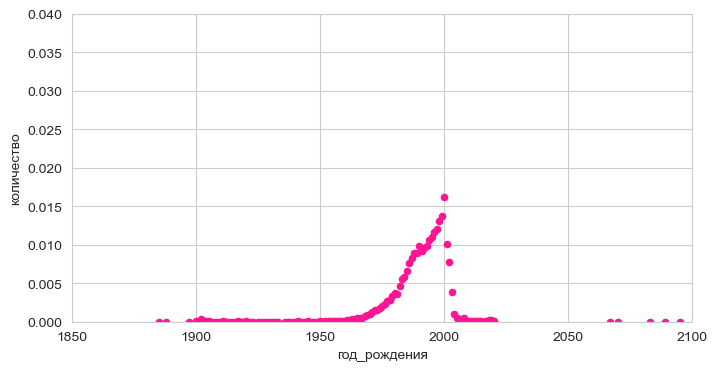

In [479]:
# Определяем аномалии в выделенной колонке 'год_рождения' 
# Большое количество значений в районе нуля, т.е. дата рождения донора не была указана
(
    users['год_рождения']
    .value_counts(normalize=True)
    .to_frame()
    .reset_index()
    .rename(columns={'index':'год_рождения', 'год_рождения':'количество'})
).plot(x='год_рождения', y='количество', kind='scatter', grid=True, c = 'deeppink', figsize=(8, 4)) 
plt.xlim(1850, 2100)
plt.ylim(0, 0.04)
plt.show();

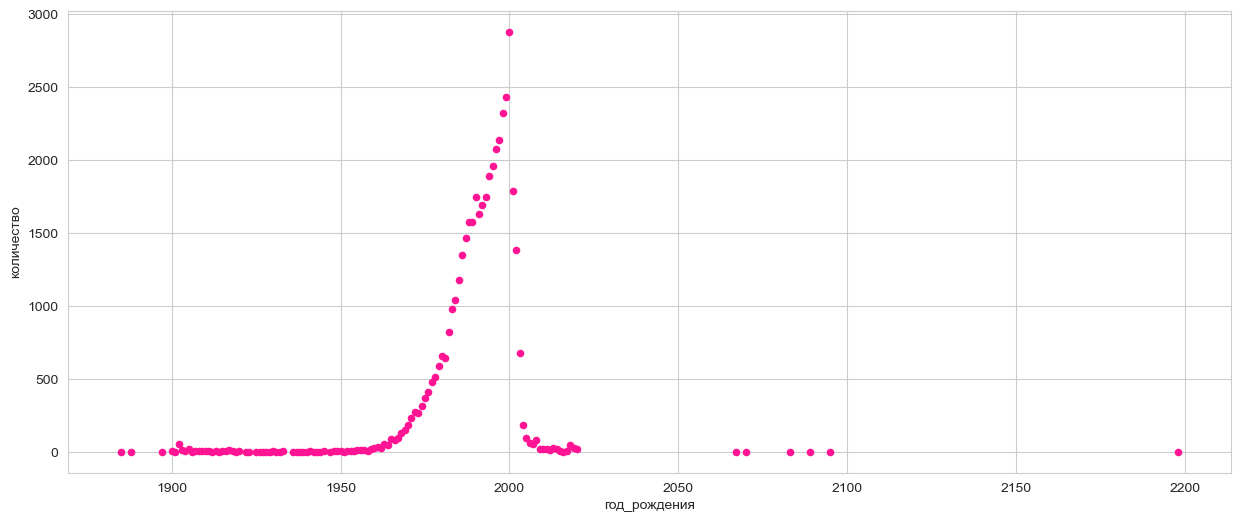

In [480]:
#определяем аномалии в выделенной колонке 'год_рождения' (шаг №2)
#исключаем из визуализации данные равные нулю, получаем большой разброс значений от 1850 до 2200 года
users_birth_year = (
    users.query('год_рождения != 0')
    .groupby(['год_рождения'])[['год_рождения']].count()
    .rename(columns={'год_рождения':'количество'})
    .sort_values(by='год_рождения', ascending=False)
    .reset_index()
).plot(x='год_рождения', y='количество', kind='scatter', grid=True, c = 'deeppink', figsize=(15, 6)) 

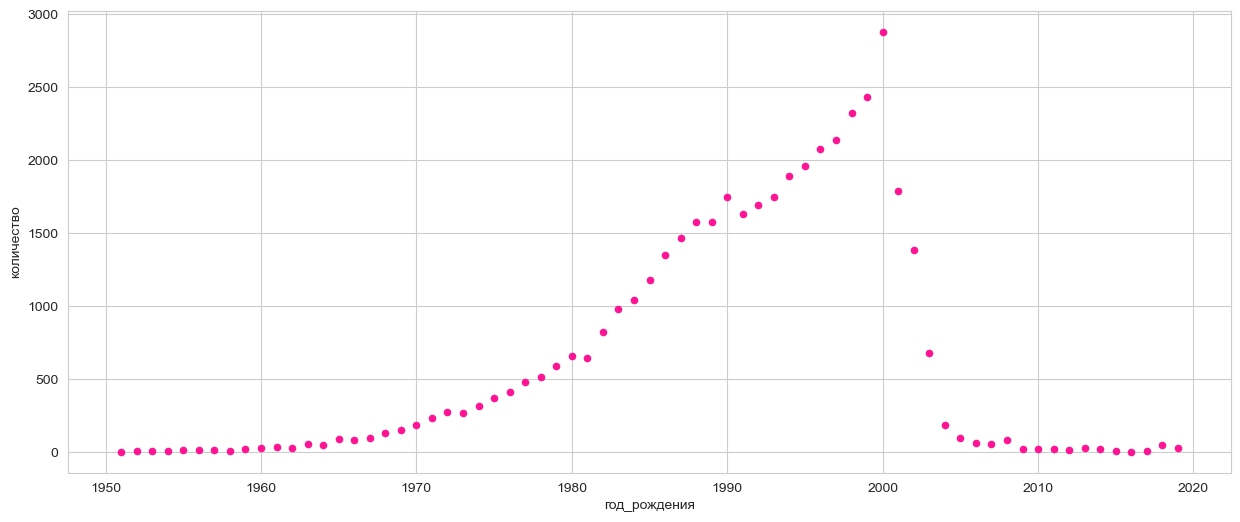

In [481]:
#определяем аномалии в выделенной колонке 'год_рождения' (шаг №3)
#исключаем из визуализации данные меньше 1920 и больше 2020) 
#т.к. по закону донором может стать только совершеннолетний гражданин, исключаем данные после 2004 года
#с предельным возрастом сложнее, т.к. раньше в России рассматривали доноров до 65 лет, сейчас этой границы нет. 

users_birth_year = (
    users.query('год_рождения != 0 & год_рождения < 2020 & год_рождения > 1950')
    .groupby(['год_рождения'])[['год_рождения']].count()
    .rename(columns={'год_рождения':'количество'})
    .sort_values(by='год_рождения', ascending=False)
    .reset_index()
).plot(x='год_рождения', y='количество', kind='scatter', grid=True, c = 'deeppink', figsize=(15, 6)) 

In [482]:
#проверяем количество данных в колонке 'возрастная_категория' 
#среди тех доноров, которые указали дату рождения, преобладают доноры возрастной категории 18-44 года.
(
    users['возрастная_категория'].value_counts(normalize=True)
    .to_frame()
    .reset_index()
    .rename(columns={'index':'возрастная_категория', 'возрастная_категория':'процент'})
    .sort_values(by='возрастная_категория')
)

,возрастная_категория,процент
1,молодой,0.22
0,не определено,0.76
3,пожилой,0.00
2,средний,0.02
4,старческий,0.00


## Вывод

1. 74% доноров не указывают свой пол. Среди оставшейся части доноров: 13% женщины и 11% мужчины;
2. 89% доноров не указывают свою группу крови (данные отсутствуют);
3. В колонке 'год_регистрации' присутствуют данные с 2018 года. За этот период в 2018 году зарегистрировалось 74% доноров. В 2019 всего 2%, а в 2020 4% (что, вероятно, связано с эпидемиологической ситуацией). В 2021 наблюдаем рост количества новых регистраций до 13%.
4. В колонке 'год_рождения' наблюдается большое количество аномалий, причиной этому может быть человеческий фактор, так как дату рождения пользователь вводит самостоятельно на сайте. 
 - Большинство доноров (75%) не указывает дату рождения;
 - В данных присутствуют выбросы (ошибки), например, 2200 год;
 - На визуализации видно, что в период с 1900 по 1950 годов присутствуют единичные события, вероятно, это опечатки, если донор родился в период с 1990 по 1995 годов;
 - В период с 2010 по 2020 присутствуют единичные события, что, вероятно, может быть актуальной датой взаимодействия донора с платформой.
 - Т.к. по закону донором может стать только совершеннолетний гражданин Российской Федерации, из анализа исключаем данные после 2004 года. С предельным возрастом несколько сложнее, раньше в России рассматривали доноров до 65 лет, но сейчас этой границы не существует. 
5. В колонке 'возрастная_категория' классификация доноров согласно ВОЗ (18–44 года (молодой возраст), 45–59 лет (средний возраст), 60–74 года (пожилой возраст), 75–90 лет (старческий возраст), старше 90 лет (долгожители)). В соответствии с этой классификацией, среди доноров:
- 21% 18–44 года (молодой возраст)
- 1% 45–59 лет (средний возраст)
- менее 1% пожилой и старческий.

## Шаг 8: Визуализация результатов и выводы к графикам

### 8.1 Распределение количества доноров по годам

Выделим четыре группы:
 - города, где проживает более 900 доноров
 - города, где проживает от 400 до 899 доноров
 - города, где проживает от 100 до 399 доноров 
 - города, где проживает от 1 до 99 доноров 

In [483]:
users['город'].nunique()

2472

In [484]:
# Создаем функцию для группировки и подсчета доноров на город 

def donor_city_query(df, city_size_value_1, city_size_value_2):
    query = (
    users.query('город != "Не указано"')
    .groupby(['город'])[['id']].count()
    .rename(columns={'id':'количество'})
    .sort_values(by='количество', ascending=False)
    .query('@city_size_value_1 <= количество <= @city_size_value_2')
    .reset_index()
)
    return query

donor_city_large = donor_city_query(users, 900, 100000)
donor_city_medium = donor_city_query(users, 400, 899)
donor_city_small = donor_city_query(users, 200, 399)
donor_city_light = donor_city_query(users, 1, 199)
#donor_city_large

In [485]:
donor_city_large['процент'] = donor_city_large['количество'] / donor_city_large['количество'].sum()
donor_city_large.head(5)

,город,количество,процент
0,Москва,33608,0.43
1,Санкт-Петербург,10858,0.14
2,Казань,4688,0.06
3,Киев,3531,0.04
4,Новосибирск,2786,0.04


In [486]:
barchart_donor_city_large = px.bar(
    data_frame=donor_city_large,
    y="количество",
    x="город",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',              
    color_continuous_scale=px.colors.sequential.Burg,                                 
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='город',      
    labels={"количество":"Количество доноров", "город":"Город"},           
    title='Распределение доноров по городам (более 900 доноров на город)', 
    width=1000,                  
    height=450,                   
    template='seaborn',            
)
barchart_donor_city_large

In [487]:
barchart_donor_city_medium = px.bar(
    data_frame=donor_city_medium,
    y="количество",
    x="город",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',               
    color_continuous_scale=px.colors.sequential.Burg,                            
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='город',       
    labels={"количество":"Количество", "город":"Город"},           
    title='Распределение доноров по городам (от 400 до 899 доноров на город)', 
    width=1000,                  
    height=450,                   
    template='seaborn',            
)
barchart_donor_city_medium

In [488]:
barchart_donor_city_small = px.bar(
    data_frame=donor_city_small,
    y="количество",
    x="город",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',             
    color_continuous_scale=px.colors.sequential.Burg,                                
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='город',     
    labels={"количество":"Количество", "город":"Город"},           
    title='Распределение доноров по городам (от 200 до 399 доноров на город)', 
    width=1000,                  
    height=450,                   
    template='seaborn',            
)
barchart_donor_city_small

### Вывод к разделу "Распределение количества доноров по годам"

График демонстрирует абсолютные значения - количество доноров на город.
1. По количеству доноров лидируют Москва и Санкт-Петербург (более 10.000 тысяч человек);
2. Всего 21 город, где проживает более 900 доноров.

### 8.2 Распределение количества регистраций по годам

In [489]:
regestration_year = (
    users['год_регистрации']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'год_регистрации', 'год_регистрации':'количество'})
)   

barchart_regestration_year = px.bar(
    data_frame=regestration_year,
    y="количество",
    x="год_регистрации",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',             
    color_continuous_scale=px.colors.sequential.Burg,                                 
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='год_регистрации',      
    labels={"количество":"Количество пользователей", "год_регистрации":"Год регистрации"},           
    title='Распределение количества регистраций по годам', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_regestration_year

In [490]:
regestration_year['процент'] = regestration_year['количество'] / regestration_year['количество'].sum()
regestration_year

,год_регистрации,количество,процент
0,2018,133058,0.75
1,2021,23801,0.13
2,2020,16975,0.10
3,2019,4076,0.02


### Вывод к разделу "Распределение количества регистраций по годам"

График демонстрирует абсолютные значения - количество зарегистрированных пользователей в период с 2018 по 2021 года.

###  8.3 Распределение частоты встречаемости группы крови среди доноров

In [491]:
# Функция для расчета группировки для построения визуализации
def donor_info_query(df, value_1, value_3,  value_2=[]):
    donor_info = (
    df[df[value_1] != "Не указано"]
    .groupby(value_1)[value_2].count()
    .reset_index()
) 
    return donor_info

donor_blood_type = donor_info_query( users, value_1='группа_крови', value_2='id', value_3='группа_крови')
#donor_blood_type

In [492]:
donor_blood_type = (
    users.query('группа_крови != "Не указано"')
    .groupby(['группа_крови'])[['группа_крови']].count()
    .rename(columns={'группа_крови':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
) 

barchart_blood_type = px.bar(
    data_frame=donor_blood_type,
    y="количество",
    x="группа_крови",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',              
    color_continuous_scale=px.colors.sequential.Burg,                                
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='группа_крови',     
    labels={"количество":"Количество доноров", "группа_крови":"Группа крови"},           
    title='Распределение частоты встречаемости группы крови среди доноров', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_blood_type

In [493]:
donor_blood_type['процент'] = donor_blood_type['количество'] / donor_blood_type['количество'].sum()
donor_blood_type

,группа_крови,количество,процент
0,A(II) Rh+,4846,0.25
1,O(I) Rh+,4669,0.24
2,B(III) Rh+,3209,0.17
3,AB(IV) Rh+,1791,0.09
4,O(I) Rh-,1455,0.08
5,A(II) Rh-,1265,0.07
6,B(III) Rh-,935,0.05
7,AB(IV) Rh-,668,0.03
8,Не знаю,454,0.02


### Вывод к разделу "Распределение частоты встречаемости группы крови среди доноров"

График демонстрирует абсолютные значения. Как видно из визуализации, наиболее часто встречается доноры с группой крови A(II) Rh+ и O(I) Rh+. Доноров с AB(IV) Rh- меньше всего.

### 8.4 Распределения доноров по полу

In [494]:
donor_gender = (
    users
    .groupby(['пол'])[['пол']].count()
    .rename(columns={'пол':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
) 

barchart_gender = px.bar(
    data_frame=donor_gender,
    y="количество",
    x="пол",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',              
    color_continuous_scale=px.colors.sequential.Burg,                               
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='пол',      
    labels={"количество":"Количество доноров", "пол":"Пол"},           
    title='Распределение доноров по полу', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_gender

In [495]:
donor_gender['процент'] = donor_gender['количество'] / donor_gender['количество'].sum()
donor_gender

,пол,количество,процент
0,Не указано,132936,0.75
1,Женский,24381,0.14
2,Мужской,20593,0.12


### Вывод к разделу 8.4:
 
- Большинство доноров не указывает свой пол. 
- Количество мужского и женского пола в целом сопоставимо, с небольшим перевесом в сторону женского.

### 8.5 Распределения доноров по возрастной группе (согласно ВОЗ)

In [496]:
donor_age_cat = (
    users.query('возрастная_категория != "не определено"')
    .groupby(['возрастная_категория'])[['id']].count()
    .rename(columns={'id':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
) 
donor_age_cat['процент'] = donor_age_cat['количество'] / donor_age_cat['количество'].sum()
donor_age_cat

,возрастная_категория,количество,процент
0,молодой,38936,0.92
1,средний,3176,0.08
2,пожилой,192,0.00
3,старческий,29,0.00


In [497]:
barchart_donor_age_cat = px.bar(
    data_frame=donor_age_cat,
    y="количество",
    x="возрастная_категория",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='возрастная_категория',  
    #hover_data=['id_пользователя'],   
    #custom_data=[''],     
    labels={"количество":"Количество доноров", "возрастная_категория":"Возрастная категория"},           
    title='Распределение доноров по возрастной группе', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_donor_age_cat


### Вывод к разделу 8.5:

График демонстрирует абсолютные значения.

Среди указавших свою дату рождения доноров, 91% относятся в возрастной категории от 18 до 44 лет.

### 8.6 Распределения доноров по возрасту

In [498]:
donor_age = (
    users.query('18 <= возраст <= 44')
    .groupby(['возраст'])[['id']].count()
    .rename(columns={'id':'количество'})
    .sort_values(by='возраст')
    .reset_index()
) 
donor_age['процент'] = donor_age['количество'] / donor_age['количество'].sum()
donor_age.head(5)

,возраст,количество,процент
0,18,187,0.00
1,19,678,0.02
2,20,1383,0.04
3,21,1789,0.05
4,22,2880,0.07


In [499]:
barchart_donor_age = px.bar(
    data_frame=donor_age,
    y="количество",
    x="возраст",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='возраст',  
    #hover_data=['id_пользователя'],   
    #custom_data=[''],     
    labels={"количество":"Количество доноров", "возраст":"Возраст"},           
    title='Распределение доноров по возрасту (возрастная группа 18-44 года)', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_donor_age

### Вывод к разделу 8.6:

График демонстрирует абсолютные значения. 

Больше всего доноров в возрасте 22 года (пик), далее идет снижение до нового пика в возрасте 32 года.


###  8.7 Распределения доноров по странам

In [500]:
donor_country = (
    users.query(' страна != "Не указано"')
    .groupby(['страна'])[['id']].count()
    .rename(columns={'id':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
)
donor_country['процент'] = (
    donor_country['количество'] / donor_country['количество'].sum()
)
donor_country.count()

страна        109
количество    109
процент       109
dtype: int64

In [501]:
donors_country = donor_country.query('количество > 20')
donors_country.head()

,страна,количество,процент
0,Россия,114254,0.85
1,Украина,11845,0.09
2,Беларусь,3581,0.03
3,Казахстан,2519,0.02
4,Кыргызстан,258,0.00


In [502]:
barchart_donor_country = px.bar(
    data_frame=donors_country,
    y="количество",
    x="страна",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',             
    color_continuous_scale=px.colors.sequential.Burg,                                
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='страна',     
    labels={"количество":"Количество доноров", "страна":"Cтрана"},           
    title='Распределение доноров по странам', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_donor_country

### Вывод к разделу 8.7:

График демонстрирует абсолютные значения. 

- Доноры из 109 стран мира;
- На графике приставлены страны, где  количество доноров более 20 человек;
- 85% доноров из России;
- 8% из Украины;
- 2% из Беларуси;
- 1% из Казахстана;
- Из других стран менее 1%.


### 8.8 Распределения частоты встречаемости группы крови среди доноров мужского и женского пола

In [503]:
donor_gender_bloodtype = (
    users.query('группа_крови != "Не указано" & пол != "Не указано"')
    .groupby(['пол', 'группа_крови'])[['группа_крови']].count()
    .rename(columns={'группа_крови':'количество'})
    .sort_values(by=['количество'], ascending=False)
    .reset_index()
)
donor_gender_bloodtype

barchart_gender_bloodtype = px.bar(
    data_frame=donor_gender_bloodtype,
    y="количество",
    x="группа_крови",
    color="пол",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    color_discrete_sequence=['palevioletred', 'gold'],                                        
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='пол',    
    labels={"количество":"Количество доноров", "группа_крови":"Группа крови"},           
    title='Распределение частоты встречаемости группы крови среди мужчин и женщин', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_gender_bloodtype

### Вывод к разделу 8.8:

График демонстрирует абсолютные значения. 
Распределения группы крови среди мужчин и женщин близко к нормальному, перекосов нет (с поправкой, что женщин доноров больше, чем мужчин).

### 8.9 Распределения года регистрации среди доноров мужского и женского пола

In [504]:
donor_gender_regestration = (
    users.query('пол != "Не указано"')
    .groupby(['пол', 'год_регистрации'])[['год_регистрации']].count()
    .rename(columns={'год_регистрации':'количество'})
    .sort_values(by=['количество'], ascending=False)
    .reset_index()
)
#donor_gender_regestration

barchart_gender_regestration = px.bar(
    data_frame=donor_gender_regestration,
    y="количество",
    x="год_регистрации",
    color="пол",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    color_discrete_sequence=['palevioletred', 'gold'],                                       
    range_color=[1,10000],                                   
    text='количество',
    hover_name='пол',    
    labels={"количество":"Количество доноров", "год_регистрации":"Год регистрации"},           
    title='Распределение регистрации по годам среди мужчин и женщин', 
    width=900,                  
    height=450,                   
    template='seaborn',     
)
barchart_gender_regestration

### Вывод к разделу 8.9:

График демонстрирует абсолютные значения. 
Распределение по годам нормальное, перекосов нет (с поправкой, что женщин доноров больше, чем мужчин).

###  8.10 Распределения количества доноров мужского и женского пола по городам

Для построения визуализации будем ссылаться на группы городов, которые выделили ранее:
- города, где проживает более 900 доноров
- города, где проживает от 400 до 899 доноров
- города, где проживает от 100 до 399 доноров
- города, где проживает от 1 до 99 доноров

In [505]:
donor_city_large_list = donor_city_large['город'].tolist()

donor_gender_city = (
    users.query('(город == @donor_city_large_list) & (пол != "Не указано") & (город != "Не указано")')
    .groupby(['пол', 'город'])[['город']].count()
    .rename(columns={'город':'количество'})
    .sort_values(by=['количество'], ascending=False)
    .reset_index()
)
#donor_gender_city

barchart_gender_city = px.bar(
    data_frame=donor_gender_city,
    y="количество",
    x="город",
    color="пол",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    color_discrete_sequence=['palevioletred', 'gold'],    #peachpuff                                  
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='город',    
    labels={"количество":"Количество доноров", "город":"Город"},           
    title='Распределение количества мужчин и женщин по городам', 
    width=900,                  
    height=450,                   
    template='seaborn'
)
barchart_gender_city

### Вывод к разделу 8.10:

График демонстрирует абсолютные значения. 
Распределение по городам нормальное, сильных перекосов нет (с поправкой, что женщин доноров больше, чем мужчин).

# Шаг 9: Портрет донора (Выводы)

### Общий портрет донора 

### На основе имеющихся данных можно выделить портрет донора проекта Donor Search:
- С большей вероятность (85%) донор проживает в России;
- С вероятностью 42% это житель Москвы (или временно проживающий в данном городе)
- Донор имеет группу крови A(II) Rh+ или O(I) Rh+
- Несколько большая вероятность, что донор женского пола.
- Донор относится с возрастной категории 18-44 лет (по классификации ВОЗ определяется, как "молодая"), вероятно, в возрасте от 22 до 32 лет.


# Шаг 10: Портрет почетного донора 

In [506]:
#создаем профайл почетного донора 
honorary_donors = users[users['почетный_донор'] == 'Да']
honorary_donors.head(2)

,id,пол,дата_рождения,регион,группа_крови,kell-фактор,цельная_кровь,плазма,тромбоциты,эритроциты,лейкоциты,костный_мозг,почетный_донор,отвод_от_донации,цельная_кровь.1,плазма.1,тромбоциты.1,эритроциты.1,лейкоциты.1,дата_регистрации,не_подтверждённые_донации,город,страна,год_регистрации,год_рождения,год_почетный_донор,год_отвода_от_донации,возраст,возрастная_категория
3437,175471,Мужской,01.06.1988,"Россия, Москва",O(I) Rh-,Не знаю,Да,Да,Да,Да,Да,Нет,Да,Нет,17,3,20,0,0,25.11.2021,0,Москва,Россия,2021,1988,0,0,34,молодой
6951,171865,Мужской,21.07.1982,Не указано,A(II) Rh-,Отрицательный,Да,Да,Да,Да,Да,Нет,Да,Нет,26,24,3,0,0,01.11.2021,2,Не указано,Не указано,2021,1982,0,0,40,молодой


In [507]:
print('Количество почетных доноров:', honorary_donors['почетный_донор'].count())

Количество почетных доноров: 177


In [508]:
# Почетные доноры проживают в трех странах Россия (95% доноров), Украина (1%), Казахстан (менее 1%) 
honorary_donors_country = (
    honorary_donors
    .groupby(['страна'])[['id']].count()
    .rename(columns={'id':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
)
honorary_donors_country['процент'] = (
    honorary_donors_country['количество'] / honorary_donors_country['количество'].sum()
)
honorary_donors_country

,страна,количество,процент
0,Россия,169,0.95
1,Не указано,4,0.02
2,Украина,3,0.02
3,Казахстан,1,0.01


In [509]:
#почетные доноры проживают в 63 городах
honorary_donors_city = (
    honorary_donors.query('город != "Не указано"')
    .groupby(['город'])[['id']].count()
    .rename(columns={'id':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
)
print('Почетные доноры проживают в', honorary_donors_city['город'].count(), 'городах')

Почетные доноры проживают в 63 городах


In [510]:
honorary_donors_city['процент'] = (
    honorary_donors_city['количество'] / honorary_donors_city['количество'].sum()
)
honorary_donors_city.head()

#больше всего почетных доноров проживает в Москве(63 человека), Санкт-Петербурге(13 человек) и Красноярске(7 человек)
barchart_honorary_donors_city = px.bar(
    data_frame=honorary_donors_city.head(10),
    y="количество",
    x="город",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',             
    color_continuous_scale=px.colors.sequential.Burg,                                
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='город',      
    labels={"количество":"Количество", "город":"Город"},           
    title='Распределение почетных доноров по городам', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_honorary_donors_city

In [511]:
honorary_donors_regestration_year = (
    honorary_donors['год_регистрации']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'год_регистрации', 'год_регистрации':'количество'})
) 

honorary_donors_regestration_year['процент'] = (
    honorary_donors_regestration_year['количество'] / honorary_donors_regestration_year['количество'].sum()
)
#honorary_donors_regestration_year

barchart_honorary_regestration_year = px.bar(
    data_frame=honorary_donors_regestration_year,
    y="количество",
    x="год_регистрации",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',             
    color_continuous_scale=px.colors.sequential.Burg,                                
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='год_регистрации',  
    labels={"количество":"Количество доноров", "год_регистрации":"Год регистрации"},           
    title='Распределение регистраций по годам среди почетных доноров', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_honorary_regestration_year

In [512]:
honorary_donors_blood_type = (
    honorary_donors.query('группа_крови != "Не указано"')
    .groupby(['группа_крови'])[['группа_крови']].count()
    .rename(columns={'группа_крови':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
) 

honorary_donors_blood_type['процент'] = (
    honorary_donors_blood_type['количество'] / honorary_donors_blood_type['количество'].sum()
)
#honorary_donors_blood_type

barchart_honorary_blood_type = px.bar(
    data_frame=honorary_donors_blood_type,
    y="количество",
    x="группа_крови",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',               
    color_continuous_scale=px.colors.sequential.Burg,                                
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='группа_крови',      
    labels={"количество":"Количество доноров", "группа_крови":"Группа крови"},           
    title='Распределение частоты встречаемости группы крови среди почетных доноров', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_honorary_blood_type

In [513]:
honorary_donor_gender = (
    honorary_donors
    .groupby(['пол'])[['пол']].count()
    .rename(columns={'пол':'количество'})
    .sort_values(by='количество', ascending=False)
    .reset_index()
) 

honorary_donor_gender['процент'] = (
    honorary_donor_gender['количество'] / honorary_donor_gender['количество'].sum()
)
#honorary_donor_gender

barchart_honorary_donor_gender = px.bar(
    data_frame=honorary_donor_gender,
    y="количество",
    x="пол",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',
    #color_discrete_sequence=['palevioletred'],               
    color_continuous_scale=px.colors.sequential.Burg,       
#     color_continuous_midpoint=100,                          
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='пол',  
    #hover_data=['id_пользователя'],   
    #custom_data=[''],     
    labels={"количество":"Количество доноров", "пол":"Пол"},           
    title='Распределение почетных доноров по полу', 
    width=1000,                  
    height=500,                   
    template='seaborn',            
)
barchart_honorary_donor_gender

In [514]:
honorary_donors_age_category = (
    honorary_donors['возрастная_категория'].value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'возрастная_категория', 'возрастная_категория':'количество'})
    .sort_values(by='возрастная_категория')
)

honorary_donors_age_category['процент'] = (
    honorary_donors_age_category['количество'] / honorary_donors_age_category['количество'].sum()
)
#honorary_donors_age_category


barchart_honorary_donors_age_category = px.bar(
    data_frame=honorary_donors_age_category,
    y="количество",
    x="возрастная_категория",
    color="количество",
    opacity=0.9,                  
    orientation="v",              
    barmode='relative',              
    color_continuous_scale=px.colors.sequential.Burg,                                
    range_color=[1,10000],                                   
    text='количество',            
    hover_name='возрастная_категория',      
    labels={"количество":"Количество доноров", "возрастная_категория":"Возрастная категория"},           
    title='Распределение почетных доноров по возрастной категории (ВОЗ)', 
    width=900,                  
    height=450,                   
    template='seaborn',            
)
barchart_honorary_donors_age_category

### Вывод

1. В базе проекта Donor Search зарегистрировано 177 почетных донора;
2. Почетные доноры проживают в трех странах: Россия (95% доноров), Украина (1%), Казахстан (менее 1%) и в 63 городах;
3. У доноров чаще встречается группа крови A(II) Rh+ (31%) и O(I) Rh+ (~27%);
4. Большая часть почетных доноров (154 человек из 177) зарегистрировалась в 2018 году (87%);
5. Среди почетных доноров мужчин в три раза больше (59%), чем женщин (19%);
6. 67% почетных доноров относятся к возрастной категории 18-44 лет, 11% к 45-59.